<a href="https://colab.research.google.com/github/Creatrohit9/ICBP/blob/main/Rohit_Bhadauriya_ICBP_2_0_solution_book_for_Supply_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carbon Footprint Optimization in Supply Chain Logistics
Traditional logistics systems prioritize cost and time, often neglecting environmental impact.
Develop a deep learning model that uses route data, fuel usage, weather, traffic, and cargo weight to
optimize delivery routes for minimal carbon emissions, helping companies make green logistics
decisions.
Sample Workflow
1. Data Collection from fleet management systems, weather APIs, or map services.
2. Data Preprocessing (normalization, missing value handling, encoding)
3. Model Training using supervised learning
4. Evaluation Metrics: MAE, RMSE, and % error on carbon prediction
5. Route Suggestion Engine that integrates predicted emissions with real-time route options


In [ ]:
import requests

headers = {
    'Authorization': 'Bearer YOUR_API_KEY'
}
response = requests.get('https://api.samsara.com/v1/fleet/vehicles', headers=headers)
data = response.json()

JSONDecodeError: Extra data: line 1 column 5 (char 4)

In [ ]:
!pip install osmnx networkx matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.0 MB/s eta 0:00:00


Goal: Predict or recommend delivery routes that minimize carbon emissions, using:

Route data (GPS, distance, road type)

Fuel usage

Weather conditions

Traffic levels

Cargo weight

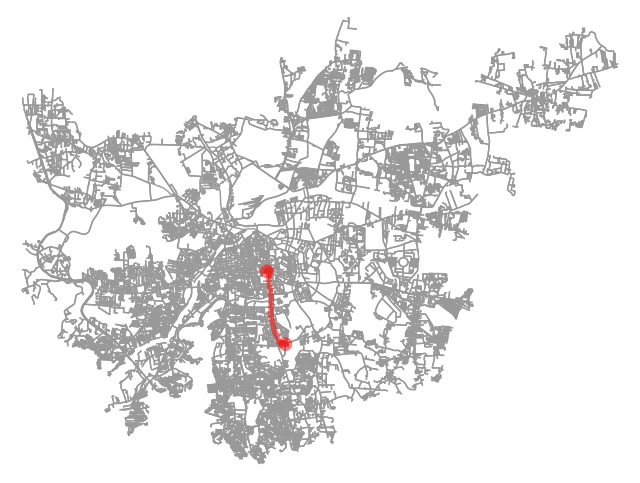

Total predicted CO₂ emissions for route: 537.78 g


In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load road network for an Indian city
place_name = "Pune, India"
G = ox.graph_from_place(place_name, network_type='drive')
# G = ox.simplify_graph(G)

# Pick nodes
orig_node = list(G.nodes())[100]
dest_node = list(G.nodes())[300]

# Add synthetic emissions data
for u, v, k, data in G.edges(keys=True, data=True):
    distance_km = data.get('length', 100) / 1000
    cargo_weight_kg = np.random.choice([200, 500, 1000])
    traffic_factor = np.random.choice([0.8, 1.0, 1.3])
    base_emission_rate = 0.25  # g CO₂/km/kg
    emission = base_emission_rate * distance_km * cargo_weight_kg * traffic_factor
    data['emission'] = emission

# Find the greenest route
path = nx.shortest_path(G, source=orig_node, target=dest_node, weight='emission')
emission_total = nx.path_weight(G, path, weight='emission')

# Plot the route
ox.plot_graph_route(G, path, route_linewidth=4, node_size=0, bgcolor='white')

print(f"Total predicted CO₂ emissions for route: {emission_total:.2f} g")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model

# Numeric inputs
fuel_input = Input(shape=(1,), name='fuel_usage')
distance_input = Input(shape=(1,), name='distance')
weight_input = Input(shape=(1,), name='cargo_weight')

# Categorical inputs
weather_input = Input(shape=(1,), name='weather')
traffic_input = Input(shape=(1,), name='traffic')
road_input = Input(shape=(1,), name='road_type')

# Embedding layers
weather_emb = Embedding(input_dim=5, output_dim=2)(weather_input)  # adjust input_dim
traffic_emb = Embedding(input_dim=3, output_dim=2)(traffic_input)
road_emb = Embedding(input_dim=3, output_dim=2)(road_input)

# Flatten embeddings
weather_flat = Flatten()(weather_emb)
traffic_flat = Flatten()(traffic_emb)
road_flat = Flatten()(road_emb)

# Concatenate all features
x = Concatenate()([
    fuel_input, distance_input, weight_input,
    weather_flat, traffic_flat, road_flat
])

# Dense layers
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear', name='emissions')(x)

# Build model
model = Model(
    inputs=[fuel_input, distance_input, weight_input,
            weather_input, traffic_input, road_input],
    outputs=output
)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ weather             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ traffic             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ road_type           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 2)      │         10 │ weather[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 2)      │          6 │ traffic[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 2)      │          6 │ road_type[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fuel_usage          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distance            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cargo_weight        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2)         │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 2)         │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 2)         │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 9)         │          0 │ fuel_usage[0][0], │
│ (Concatenate)       │                   │            │ distance[0][0],   │
│                     │                   │            │ cargo_weight[0][… │
│                     │                   │            │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        640 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emissions (Dense)   │ (None, 1)         │         33 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,775 (10.84 KB)

 Trainable params: 2,775 (10.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import networkx as nx

# Sample graph
G = nx.DiGraph()

# Add edges: (node1, node2, attributes)
G.add_edge('A', 'B', distance=5, traffic='Moderate', weather='Sunny', weight_kg=500)
G.add_edge('B', 'C', distance=7, traffic='High', weather='Sunny', weight_kg=500)
# ...

# Predict emissions for each edge using your deep model
for u, v, data in G.edges(data=True):
    features = {
        'fuel_usage': estimate_fuel(data['distance'], data['traffic']),
        'distance': data['distance'],
        'cargo_weight': data['weight_kg'],
        'weather': encode_weather(data['weather']),
        'traffic': encode_traffic(data['traffic']),
        'road_type': encode_road('Urban')  # example
    }
    emission = model.predict([np.array([[features[k]]]) for k in features])[0][0]
    data['emission'] = emission

# Now use Dijkstra with emissions as weights
shortest_path = nx.dijkstra_path(G, source='A', target='C', weight='emission')


NameError: name 'estimate_fuel' is not defined

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from utils.routing.distances import (
	distance_picking,
	next_location
)
from utils.routing.routes import (
	create_picking_route
)
from utils.batch.mapping_batch import (
	orderlines_mapping,
	locations_listing
)
from utils.cluster.mapping_cluster import (
	df_mapping
)
from utils.batch.simulation_batch import (
	simulation_wave,
	simulate_batch
)
from utils.cluster.simulation_cluster import(
	loop_wave,
	simulation_cluster,
	create_dataframe,
	process_methods
)
from utils.results.plot import (
	plot_simulation1,
	plot_simulation2
)
import streamlit as st
# from streamlit import caching

# Set page configuration
st.set_page_config(page_title ="Improve Warehouse Productivity using Order Batching",
                    initial_sidebar_state="expanded",
                    layout='wide',
                    page_icon="🛒")

# Set up the page
@st.cache(persist=False,
          allow_output_mutation=True,
          suppress_st_warning=True,
          show_spinner= True)
# Preparation of data
def load(filename, n):
    df_orderlines = pd.read_csv(IN + filename).head(n)
    return df_orderlines


# Alley Coordinates on y-axis
y_low, y_high = 5.5, 50
# Origin Location
origin_loc = [0, y_low]
# Distance Threshold (m)
distance_threshold = 35
distance_list = [1] + [i for i in range(5, 100, 5)]
IN = 'static/in/'
# Store Results by WaveID
list_wid, list_dst, list_route, list_ord, list_lines, list_pcs, list_monomult = [], [], [], [], [], [], []
list_results = [list_wid, list_dst, list_route, list_ord, list_lines, list_pcs, list_monomult]	# Group in list
# Store Results by Simulation (Order_number)
list_ordnum , list_dstw = [], []

# Simulation 1: Order Batch
# SCOPE SIZE
st.header("**🥇 Impact of the wave size in orders (Orders/Wave) **")
st.subheader('''
        🛠️ HOW MANY ORDER LINES DO YOU WANT TO INCLUDE IN YOUR ANALYSIS?
    ''')
col1, col2 = st.beta_columns(2)
with col1:
	n = st.slider(
				'SIMULATION 1 SCOPE (THOUSDAND ORDERS)', 1, 200 , value = 5)
with col2:
	lines_number = 1000 * n
	st.write('''🛠️{:,} \
		order lines'''.format(lines_number))
# SIMULATION PARAMETERS
st.subheader('''
        🛠️ SIMULATE ORDER PICKING BY WAVE OF N ORDERS PER WAVE WITH N IN [N_MIN, N_MAX] ''')
col_11 , col_22 = st.beta_columns(2)
with col_11:
	n1 = st.slider(
				'SIMULATION 1: N_MIN (ORDERS/WAVE)', 0, 20 , value = 1)
	n2 = st.slider(
				'SIMULATION 1: N_MAX (ORDERS/WAVE)', n1 + 1, 20 , value = int(np.max([n1+1 , 10])))
with col_22:
		st.write('''[N_MIN, N_MAX] = [{:,}, {:,}]'''.format(n1, n2))
# START CALCULATION
start_1= False
if st.checkbox('SIMULATION 1: START CALCULATION',key='show', value=False):
    start_1 = True
# Calculation
if start_1:
	df_orderlines = load('df_lines.csv', lines_number)
	df_waves, df_results = simulate_batch(n1, n2, y_low, y_high, origin_loc, lines_number, df_orderlines)
	plot_simulation1(df_results, lines_number)

# Simulation 2: Order Batch using Spatial Clustering
# SCOPE SIZE
st.header("**🥈 Impact of the order batching method **")
st.subheader('''
        🛠️ HOW MANY ORDER LINES DO YOU WANT TO INCLUDE IN YOUR ANALYSIS?
    ''')
col1, col2 = st.beta_columns(2)
with col1:
	n_ = st.slider(
				'SIMULATION 2 SCOPE (THOUSDAND ORDERS)', 1, 200 , value = 5)
with col2:
	lines_2 = 1000 * n_
	st.write('''🛠️{:,} \
		order lines'''.format(lines_2))
# START CALCULATION
start_2 = False
if st.checkbox('SIMULATION 2: START CALCULATION',key='show_2', value=False):
    start_2 = True
# Calculation
if start_2:
	df_orderlines = load('df_lines.csv', lines_2)
	df_reswave, df_results = simulation_cluster(y_low, y_high, df_orderlines, list_results, n1, n2,
			distance_threshold)
	plot_simulation2(df_reswave, lines_2, distance_threshold)

ModuleNotFoundError: No module named 'utils'